### Reading from File and Cleaning File

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dateutil import parser
import os

try:
  top = Path(__file__ + '../..').resolve()
  wd = str(top)
except:
  wd = os.getcwd()

# movie = pd.read_csv(wd+"/resources/movie.csv")
# df = movie[["movie_title", "actor_1_name", "title_year", "country", "gross"]]

movie = pd.read_csv(wd+"/resources/video_game.csv")
df = movie[["Rank","Name","Year", "Publisher","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

# Data Cleaning
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
#df.dropna()
#df.dtypes
#df["title_year"]=df["title_year"].astype(int)
#df.sort_values(by='gross', ascending=False)

df.head(100)

/var/folders/dj/wcp4hvwd7wzglrm85gjck8lr0000gn/T/ipykernel_22426/899457203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/dj/wcp4hvwd7wzglrm85gjck8lr0000gn/T/ipykernel_22426/899457203.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,2006,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,1985,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,2008,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,2009,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,1996,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,1989,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,2006,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,2006,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,2009,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,1984,Nintendo,26.93,0.63,0.28,0.47,28.31


### Mean

In [2]:
df_mean = df[['EU_Sales']].mean()

df_mean

EU_Sales    5.314407
dtype: float64

### Variance

In [3]:
df_var = df[['EU_Sales']].var()
df_var

EU_Sales    17.024553
dtype: float64

### MLE Implementation

In [5]:
from scipy.optimize import newton

In [6]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [7]:
dfEU = pd.DataFrame(df['EU_Sales'])

In [8]:
log_mean = df_mean.apply(np.log)
mean_log = dfEU.apply(np.log).mean()

#### Alpha For MLE

In [9]:
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

1.9090175492537222

#### Beta for MLE

In [10]:
beta_mle = alpha_mle/df_mean
beta_mle

EU_Sales    0.359216
dtype: float64

#### Model MLE

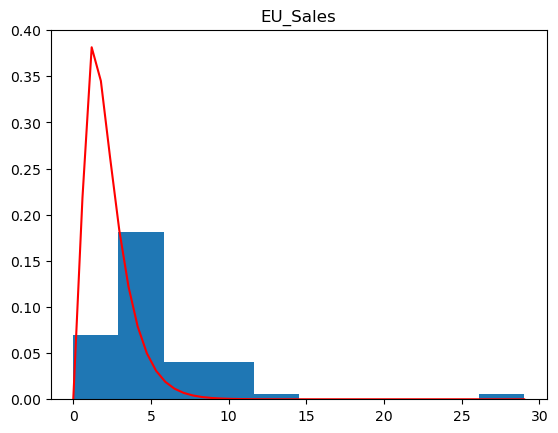

In [14]:
from scipy.stats.distributions import gamma

dfEU.hist(density=True, bins=10, grid=False)
x = np.linspace(0, dfEU.max())

plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r-')

In [12]:
from scipy.stats import gamma

gamma.fit(dfEU)

(0.49182626863368006, 0.009999999999999998, 1.7385814841077458)